In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [3]:
def file_opener(json_file):
    file_to_open = data_folder / json_file
    f = open(file_to_open)
    data = json.load(f)

    data.keys()

    a = data['Staff Review of the Economic Situation']
    b = data['Staff Review of the Financial Situation']
    c = data['Staff Economic Outlook']
    d = data["Participants' Views on Current Economic Conditions and the Economic Outlook"]
    #e = data['Committee Policy Action']

    a.extend(b+c+d)
    
    total = ''.join(a)

    return a, b, c, d, total

In [4]:
def bigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(words)
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    
    return bigramFreqTable

In [5]:
def bigrams_process():
    staff_review_econ = ''.join(a)
    staff_review_financial = ''.join(b)
    staff_econ_outlook = ''.join(c)
    participants_views = ''.join(d)
    #policy_action = ''.join(e)
    sample = ''.join(total)

    df_staff_review_econ = bigrams(staff_review_econ)
    df_staff_review_financial = bigrams(staff_review_financial)
    df_staff_econ_outlook = bigrams(staff_econ_outlook)
    df_participants_views = bigrams(participants_views)
    #df_policy_action = bigrams(policy_action)
    df_sample = bigrams(sample)

    #print(df_sample.head())

    return df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def bigrams_plot():
    df = df_sample.head(20).reset_index(drop=True)
    #print(df)
    ax = df.plot.bar(x='bigram', y='freq', rot=0, figsize=(20,10))
    plt.xticks(rotation=45, ha='right')

    """
    # initialize a figure
    fig=plt.figure(figsize=(18, 6))
    plt.subplots_adjust(hspace = 2)
    
    # Do a 2x2 chart
    ax1 = fig.add_subplot(221)
    df_staff_review_econ.head(8).plot(x='bigram', y='freq', kind='bar', ax=ax1, legend=False).set_title('staff review econ')
    plt.xticks(rotation=45, ha='right')

    ax2 = fig.add_subplot(222)
    df_staff_review_financial.head(8).plot(x='bigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('staff review finance')
    plt.xticks(rotation=45, ha='right')

    ax3 = fig.add_subplot(223)
    df_staff_econ_outlook.head(8).plot(x='bigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('staff econ outlook')
    plt.xticks(rotation=45, ha='right')

    ax4 = fig.add_subplot(224)
    df_participants_views.head(8).plot(x='bigram', y='freq', kind='bar', ax=ax4, legend=False, color="grey").set_title('participants view')
    plt.xticks(rotation=45, ha='right')
    """

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
                        bigram  freq
11           (fou

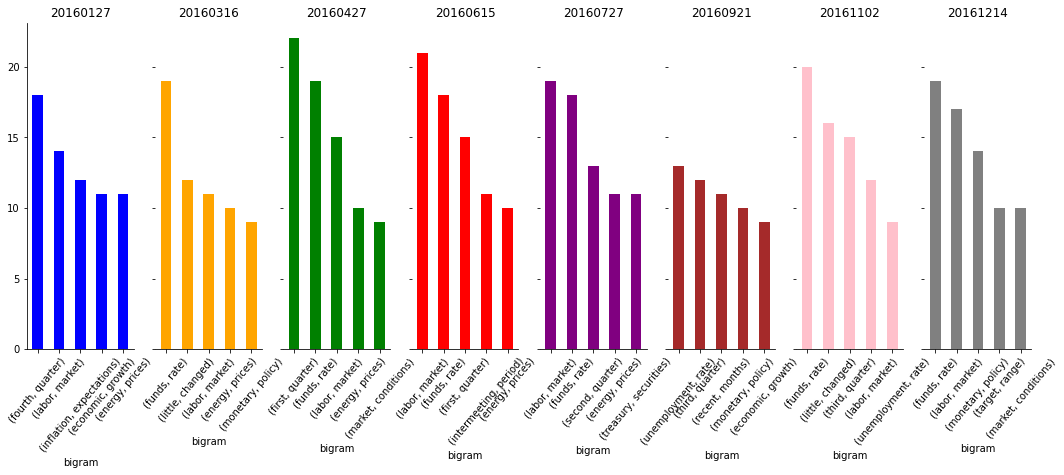

In [87]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = bigrams_process()
    #bigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]



#print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='bigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20160127')
lst[1].plot(x='bigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20160316')
lst[2].plot(x='bigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20160427')
lst[3].plot(x='bigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20160615')
lst[4].plot(x='bigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20160727')
lst[5].plot(x='bigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20160921')
lst[6].plot(x='bigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20161102')
lst[7].plot(x='bigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20161214')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)
